# Employee Attrition Analysis

## Introduction

Employee attrition is a critical issue for organizations, as it affects productivity, morale, and costs associated with hiring and training new employees. This projects aims to analyze the factors contributing to employee attrition and build predictive models to identify employees at risk of leaving. By understanding these factors, we can develop targeted retention strategies to improve employee satisfaction and reduce turnover.

## Dataset Description

The dataset contains various attributes related to employee demographics, job satisfaction, performance, and attrition. Here are some key features:

- **Age**: Age of the employee.
- **Attrition**: Whether the employee left the company (Yes/No).
- **BusinessTravel**: Frequency of business travel (Travel_Rarely, Travel_Frequently, Non-Travel).
- **Department**: Department of the employee (Sales, Research & Development, Human Resources).
- **JobRole**: Role of the employee within the company.
- **YearsAtCompany**: Number of years the employee has been with the company.
- **JobSatisfaction**: Job satisfaction level (1-4).
- **OverTime**: Whether the employee works overtime (Yes/No).

In [2]:
import pandas as pd

df = pd.read_csv('employee_attrition_and_performance.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'employee_attrition_and_performance.csv'

In [ ]:
# Handle missing values (if any)
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Encode categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    

## Exploratory Data Analysis

### Distribution of Attrition

First, let's look at the distribution of the target variable, 'Attrition'.


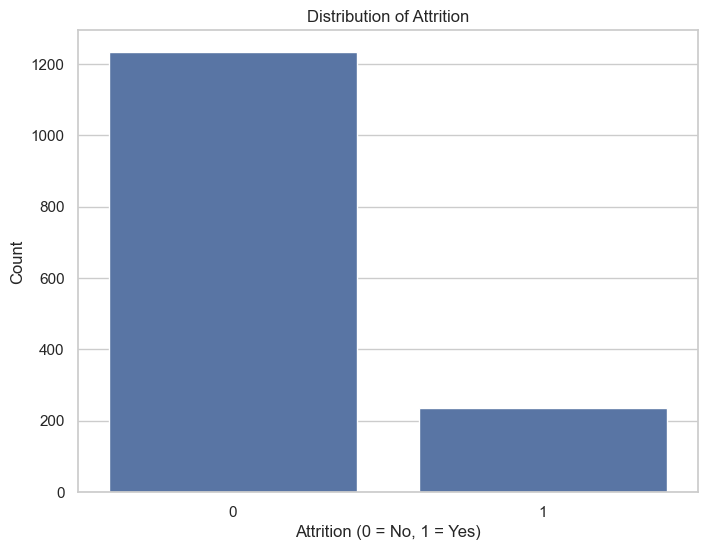

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Distribution of Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### Age vs Attrition

Next, let's analyze the age distribution for employees who stayed vs. those who left.

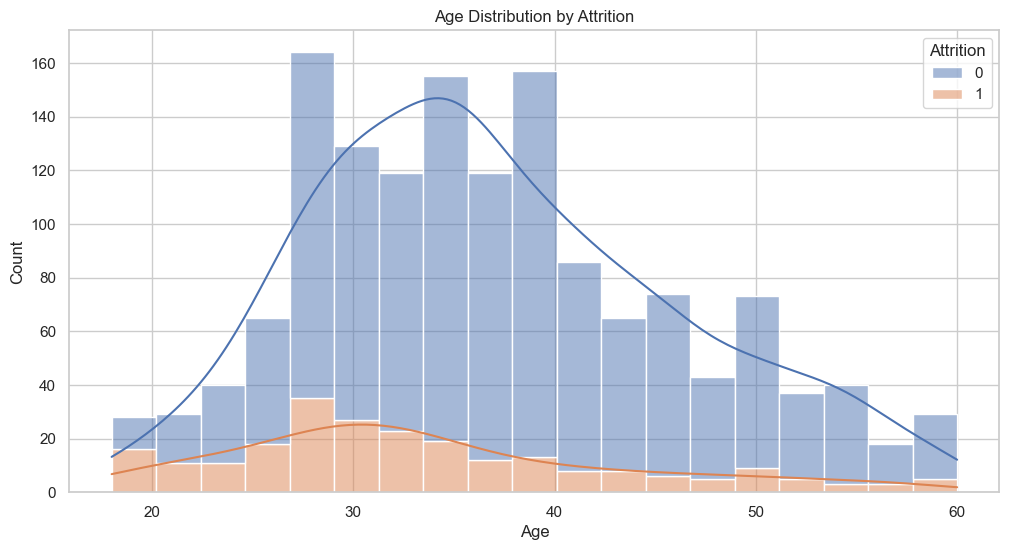

In [ ]:
# Age vs. Attrition
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Department vs Attrition

I will compare attrition rates across different departments.

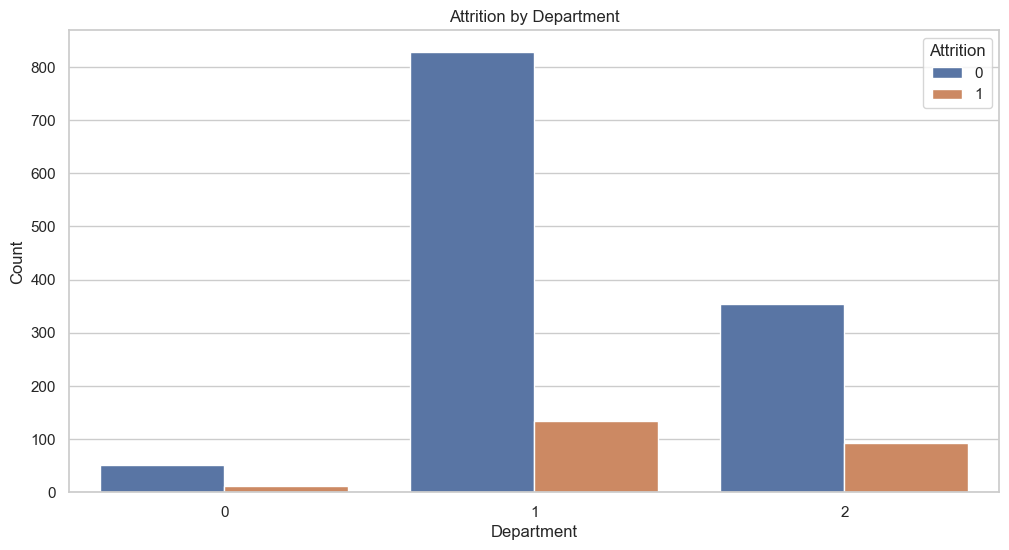

In [ ]:
# Department vs Attrition
plt.figure(figsize=(12,6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

### Job Satisfaction vs Attrition

Analyzing the relationship between job satisfaction and attrition.

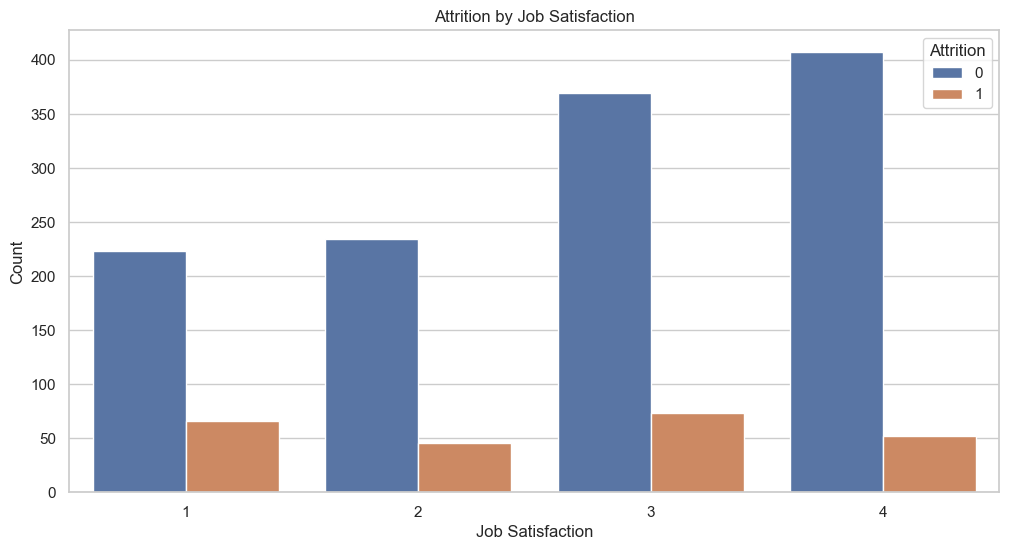

In [ ]:
# Job Satisfaction vs. Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

### Overtime vs Attrition

Exploring the impact of overtime on employee attrition

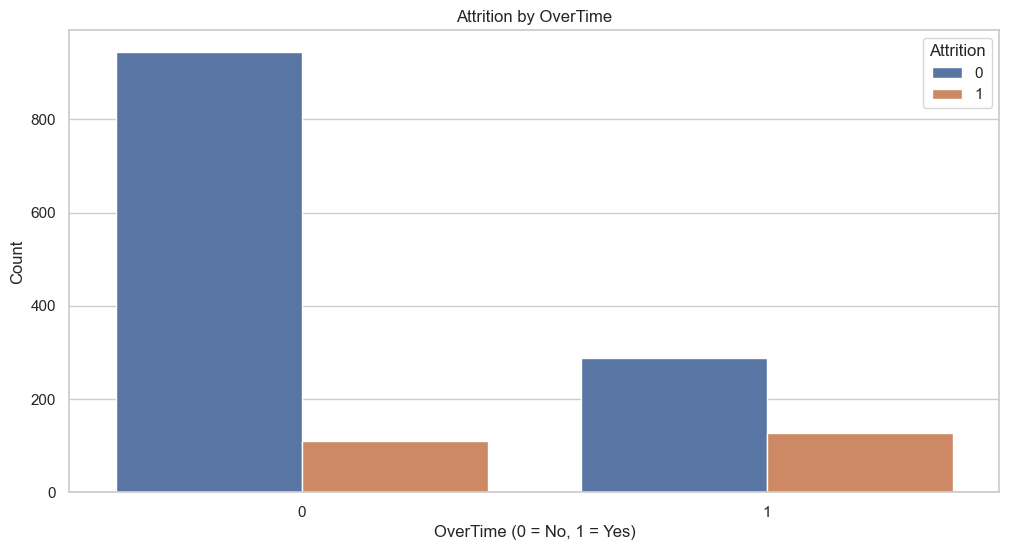

In [ ]:
# OverTime vs. Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Handle the 'Over18' column by encoding it
df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})

# Define the features (X) and the target (y)
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1176, 34), (294, 34), (1176,), (294,))

## Data Preprocessing

In this section, I will preprocess the data to make it suitable for modeling. This includes handling categorical variables and scaling numerical features.

### Scaling Numerical Features

I will use 'StandardScaler' to scale the numerical features. Scaling helps in improving the performance of the models by standardizing the range of the features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

## Model Building and Evaluation

I will train various models to predict employee attrition. We will start with Logistic Regression, followed by Random Forest, and Gradient Boosting. 

### Logistic Regression

I start by training a Logistic Regression model to predict employee attrition.

In [ ]:
# Initialize Logistic Regression model with increased iterations
logreg = LogisticRegression(max_iter=2000)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Display the evaluation metrics
logreg_metrics = {
    "Accuracy": accuracy_logreg,
    "Precision": precision_logreg,
    "Recall": recall_logreg,
    "F1 Score": f1_logreg
}

print(logreg_metrics)

## Hyperparameter Tuning

To improve the performance of our Logistic Regression model, I will perform hyperparameter tuning to find the best set of parameters.

### Evaluating Different Hyperparameter Combinations

I will evaluate different combinations of hyperparameters to determine the best set for the model.

In [ ]:

# Define a function to train and evaluate the model with given hyperparameters
def evaluate_logistic_regression(penalty, C, solver):
    logreg = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=2000)
    logreg.fit(X_train_scaled, y_train)
    y_pred = logreg.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    return {
        "Penalty": penalty,
        "C": C,
        "Solver": solver,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate different hyperparameter combinations
results = []
for penalty in ['l2']:
    for C in [0.1, 1, 10]:
        for solver in ['liblinear', 'lbfgs']:
            results.append(evaluate_logistic_regression(penalty, C, solver))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))

  Penalty     C     Solver  Accuracy  Precision    Recall  F1 Score
2      l2   1.0  liblinear  0.894558   0.700000  0.358974  0.474576
4      l2  10.0  liblinear  0.894558   0.700000  0.358974  0.474576
5      l2  10.0      lbfgs  0.894558   0.700000  0.358974  0.474576
3      l2   1.0      lbfgs  0.891156   0.684211  0.333333  0.448276
0      l2   0.1  liblinear  0.894558   0.785714  0.282051  0.415094
1      l2   0.1      lbfgs  0.894558   0.833333  0.256410  0.392157


## Feature Importance Analysis 

Analyzing the coefficients of the best-performing model to understand the importance of each feature.

In [ ]:
import numpy as np

# Train the best model with optimal hyperparameters
best_logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=2000)
best_logreg.fit(X_train_scaled, y_train)

# Extract the coefficients from the best logistic regression model
best_coefficients = best_logreg.coef_[0]

# Create a DataFrame to display feature importance
best_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_coefficients,
    'Absolute Coefficient': np.abs(best_coefficients)
})

# Sort the DataFrame by absolute coefficient value
best_feature_importance = best_feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(best_feature_importance.head(10))

                    Feature  Coefficient  Absolute Coefficient
21                 OverTime     0.856632              0.856632
30           YearsAtCompany     0.681330              0.681330
31       YearsInCurrentRole    -0.658866              0.658866
19       NumCompaniesWorked     0.461335              0.461335
32  YearsSinceLastPromotion     0.454104              0.454104
16            MaritalStatus     0.443337              0.443337
33     YearsWithCurrManager    -0.430645              0.430645
13                 JobLevel    -0.424727              0.424727
15          JobSatisfaction    -0.403062              0.403062
3                Department     0.374418              0.374418


## Insights and Recommendations

Based on the feature importance analysis, I can draw the following insights and recommendations:

### Insights
1. **Overtime**: Employees who work overtime are more likely to leave.
2. **Years At Company**: Longer tenure at the company increases the likelihood of attrition.
3. **Years In CurrentRole**: Employees who have been in their current role for a longer period are less likely to leave.
4. **Number of Companies Worked**: Employees who have worked at more companies are more likely to leave.
5. **Years Since Last Promotion**: Employees who have not been promoted recently are more likely to leave.
6. **Marital Status**: Indicates marital status has a significant impact on attrition.
7. **Years With Current Manager**: Employees who have been with their current manager for a longer period are less likely to leave.
8. **Job Level**: Employees at higher job levels are less likely to leave.
9. **Job Satisfaction**: Higher job satisfaction reduces the likelihood of attrition.
10. **Department**: Different departments have varying impacts on attrition.

### Recommendations
1. **Monitor Overtime**: Develop policies to manage and reduce excessive overtime.
2. **Retention Programs for Long-term Employees**: Implement career development programs for long-term employees.
3. **Role Rotation and Development**: Encourage role rotation and career development programs to keep employees engaged.
4. **Regular Promotions and Recognition**: Ensure employees are recognized and promoted regularly to keep them motivated.
5. **Support for Marital Status**: Provide support programs tailored to different marital statuses.
6. **Strengthen Manager-Employee Relationships**: Foster strong relationships between employees and managers.
7. **Department-specific Strategies**: Develop tailored retention strategies for different departments.